# 数据预处理

In [1]:
from keras.preprocessing.image import ImageDataGenerator

D:\anaconda\envs\zhy\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
image_width = 224
image_height = 224
image_size = (image_width, image_height)

train_datagen = ImageDataGenerator(
        rescale=1./255,        # normalize pixel values to [0,1]
        shear_range=0.2,       # randomly applies shearing transformation
        zoom_range=0.2,        # randomly applies shearing transformation
        horizontal_flip=True)  # randomly flip the images

train_generator = train_datagen.flow_from_directory(
    'data\mytrain',
    target_size=image_size,  # all images will be resized to 224x224
    batch_size=32,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(
    'data\myvalid',
    target_size=image_size,  # all images will be resized to 224x224
    batch_size=32,
    class_mode='binary')

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


# 数据探索

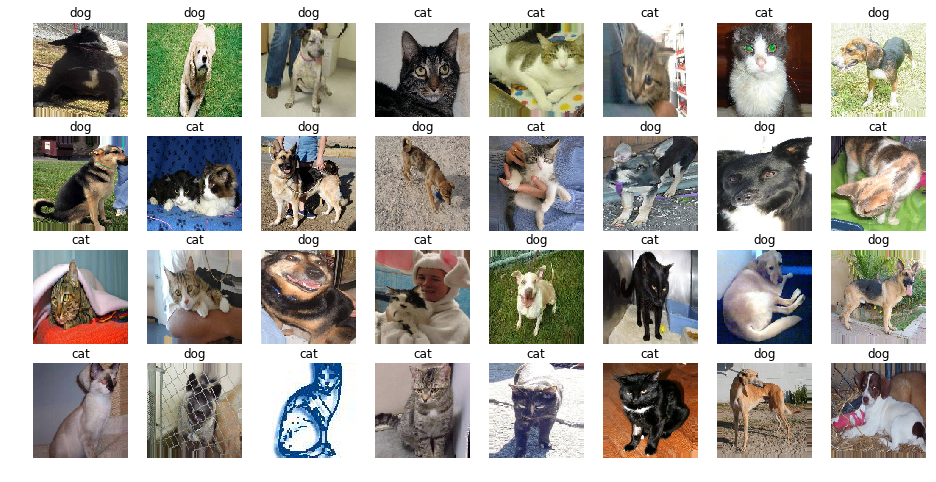

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
x, y = train_generator.next()

plt.figure(figsize=(16, 8))
for i, (img, label) in enumerate(zip(x, y)):
    plt.subplot(4, 8, i+1)
    if label == 1:
        plt.title('dog')
    else:
        plt.title('cat')
    plt.axis('off')
    plt.imshow(img, interpolation="nearest")

# 模型建立

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [5]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 223, 223, 32)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 32)      4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 54, 54, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 64)        16448     
__________

In [7]:
from keras import optimizers
adam = optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [8]:
nb_epoch = 100

In [9]:
from keras.callbacks import ModelCheckpoint, TensorBoard
best_model = ModelCheckpoint("cnn_best4.h5", monitor='val_acc', verbose=0, save_best_only=True)

In [10]:
cnn=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=nb_epoch,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[best_model])

Epoch 1/100
704/704 [==============================] - 437s 620ms/step - loss: 0.6544 - acc: 0.6048 - val_loss: 0.5948 - val_acc: 0.6752
Epoch 2/100
704/704 [==============================] - 247s 351ms/step - loss: 0.5480 - acc: 0.7265 - val_loss: 0.4720 - val_acc: 0.7708
Epoch 3/100
704/704 [==============================] - 247s 351ms/step - loss: 0.4690 - acc: 0.7876 - val_loss: 0.3795 - val_acc: 0.8332
Epoch 4/100
704/704 [==============================] - 245s 348ms/step - loss: 0.4114 - acc: 0.8184 - val_loss: 0.4165 - val_acc: 0.8092
Epoch 5/100
704/704 [==============================] - 246s 349ms/step - loss: 0.3722 - acc: 0.8382 - val_loss: 0.2916 - val_acc: 0.8752
Epoch 6/100
704/704 [==============================] - 248s 352ms/step - loss: 0.3360 - acc: 0.8579 - val_loss: 0.2840 - val_acc: 0.8760
Epoch 7/100
704/704 [==============================] - 250s 355ms/step - loss: 0.2984 - acc: 0.8739 - val_loss: 0.2641 - val_acc: 0.8876
Epoch 8/100
704/704 [====================

# 绘制loss和ACC

Text(0.5,1,'Loss Curves')

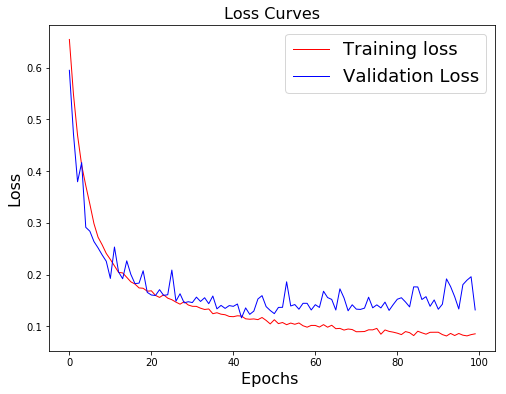

In [11]:
import matplotlib.pyplot as plt   
%matplotlib inline 

# summarize history for accuracy
plt.figure(figsize=[8,6])
plt.plot(cnn.history['loss'],'r',linewidth=1.0)
plt.plot(cnn.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

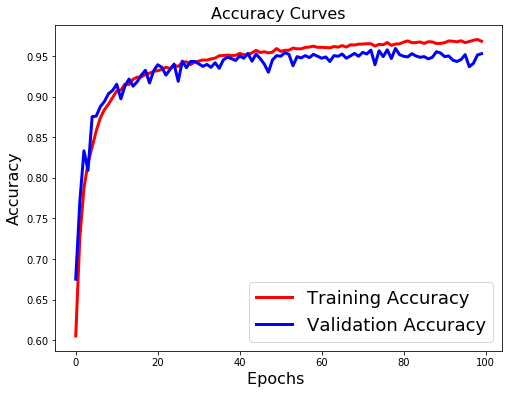

In [12]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(cnn.history['acc'],'r',linewidth=3.0)
plt.plot(cnn.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [13]:
with open('resnet.json', 'w') as f:
    f.write(model.to_json())

In [14]:
model.load_weights('cnn_best4.h5')

# 测试

In [15]:
def get_image(index):
    img = cv2.imread('data/test/%d.jpg' % index)
    img = cv2.resize(img,(224,224))
    img.astype(np.float32)
    img = img / 255.0
    return img

test_num = 12500

In [16]:
from tqdm import *
import numpy as np
import random
import os
import cv2

image_matrix = np.zeros((test_num, image_width, image_height, 3), dtype=np.float32)

for i in tqdm(range(test_num)):
    image_matrix[i] = get_image(i+1)

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [01:10<00:00, 176.63it/s]


In [17]:
predictions = model.predict(image_matrix, verbose=0)

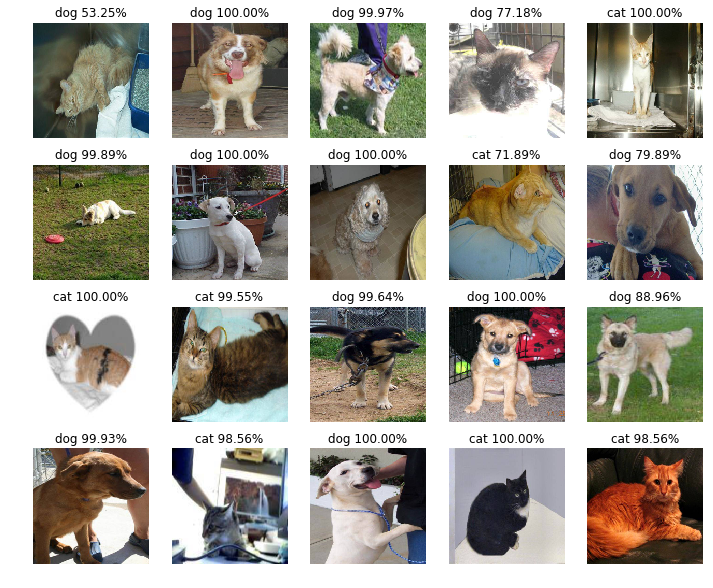

In [18]:
plt.figure(figsize=(12, 10))
for i in range(20):
    x = get_image(random.randint(1, test_num))
    prediction = model.predict(np.expand_dims(x, axis=0))[0]
    
    plt.subplot(4, 5, i+1)
    if prediction < 0.5:
        plt.title('cat %.2f%%' % (100 - prediction*100))
    else:
        plt.title('dog %.2f%%' % (prediction*100))
    
    plt.axis('off')
    plt.imshow(x[:,:,::-1]) # convert BGR to RGB

In [19]:
s = 'id,label\n'
for i, p in enumerate(predictions):
    s += '%d,%f\n' % (i+1, p)

with open('result.csv', 'w') as f:
    f.write(s)